In [1]:
import pandas as pd

In [2]:
brasilia2003 = pd.read_csv("arquivos/INMET_CO_DF_A001_BRASILIA_01-01-2003_A_31-12-2003.CSV", encoding='latin1', decimal=',', sep=';', skiprows=8)
brasilia2013 = pd.read_csv("arquivos/INMET_CO_DF_A001_BRASILIA_01-01-2013_A_31-12-2013.CSV",  encoding='latin1', decimal=',', sep=';', skiprows=8)
brasilia2023 = pd.read_csv('arquivos/INMET_CO_DF_A001_BRASILIA_01-01-2023_A_31-12-2023.CSV',  encoding='latin1', decimal=',', sep=';', skiprows=8)


Padronizando as colunas

In [3]:
brasilia2023.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)', 'RADIACAO GLOBAL (Kj/m²)': 'RADIACAO GLOBAL (KJ/m²)'}, inplace=True)
brasilia2023['DATA (YYYY-MM-DD)'] = pd.to_datetime(brasilia2023['DATA (YYYY-MM-DD)'], format="%Y/%m/%d", errors='coerce')


Gerando MultiIndex de Ano, Meses e Dias

In [4]:
brasilia = pd.concat([brasilia2003, brasilia2013, brasilia2023])
brasilia['DATA (YYYY-MM-DD)'] = pd.to_datetime(brasilia['DATA (YYYY-MM-DD)'])
colunaData = pd.DatetimeIndex(brasilia['DATA (YYYY-MM-DD)'])
brasilia['Ano'] = colunaData.year
brasilia['Mes'] = colunaData.month
brasilia['Dia'] = colunaData.day
#print(brasilia.dtypes)
brasilia.set_index(['Ano', 'Mes', 'Dia'], inplace=True)
brasilia.drop(['DATA (YYYY-MM-DD)'], axis=1, inplace=True)

brasilia["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"] = pd.to_numeric(brasilia["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"])

brasilia["HORA (UTC)"] = brasilia["HORA (UTC)"].apply(lambda x: int(str(x)[0:2]))
brasilia

HORA (UTC)  PRECIPITAÇÃO TOTAL, HORÁRIO (mm)  \
Ano  Mes Dia                                                 
2003 1   1             0                               0.0   
         1             1                               0.0   
         1             2                               0.0   
         1             3                               0.0   
         1             4                               0.0   
...                  ...                               ...   
2023 12  31           19                               0.0   
         31           20                               0.0   
         31           21                               0.0   
         31           22                               0.0   
         31           23                               0.0   

              PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  \
Ano  Mes Dia                                                          
2003 1   1                                                886.9       
         1                                                887.3       
         1                                                887.8       
         1                                                886.9       
         1                                                886.8       
...                                                         ...       
2023 12  31                                               884.2       
         31                                               883.7       
         31                                               883.5       
         31                                               884.5       
         31                                               885.3       

              PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)  \
Ano  Mes Dia                                                    
2003 1   1                                              887.0   
         1                                              887.3   
         1                                              887.8   
         1                                              887.8   
         1                                              886.9   
...                                                       ...   
2023 12  31                                             885.2   
         31                                             884.3   
         31                                             883.7   
         31                                             884.5   
         31                                             885.3   

              PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)  \
Ano  Mes Dia                                                     
2003 1   1                                               886.5   
         1                                               886.9   
         1                                               887.3   
         1                                               886.9   
         1                                               886.7   
...                                                        ...   
2023 12  31                                              884.2   
         31                                              883.7   
         31                                              883.4   
         31                                              883.5   
         31                                              884.5   

              RADIACAO GLOBAL (KJ/m²)  \
Ano  Mes Dia                            
2003 1   1                    -9999.0   
         1                    -9999.0   
         1                    -9999.0   
         1                    -9999.0   
         1                    -9999.0   
...                               ...   
2023 12  31                    1252.2   
         31                    1178.8   
         31                     873.0   
         31                     104.0   
         31                       NaN   

              TEMPERATURA DO AR - BULBO SECO

In [5]:
mi = []
for columns in brasilia.columns:
    a = (columns,"")
    if(columns.find("PRESSAO")>-1 or columns.find("PRESSÃO")>-1):
        a = ("Pressão",columns)
    if(columns.find("TEMPERATURA")>-1):
        a = ("Temperatura",columns)
    if(columns.find("UMIDADE")>-1):
        a = ("Umidade",columns)
    if(columns.find("VENTO")>-1):
        a = ("Velocidade do Vento",columns)
    if(columns.find("PRECIPITAÇÃO")>-1):
        a = ("Precipitação",columns)
    mi.append(a)
brasilia.columns = pd.MultiIndex.from_tuples(mi)
brasilia

HORA (UTC)                     Precipitação  \
                        PRECIPITAÇÃO TOTAL, HORÁRIO (mm)   
Ano  Mes Dia                                               
2003 1   1            0                              0.0   
         1            1                              0.0   
         1            2                              0.0   
         1            3                              0.0   
         1            4                              0.0   
...                 ...                              ...   
2023 12  31          19                              0.0   
         31          20                              0.0   
         31          21                              0.0   
         31          22                              0.0   
         31          23                              0.0   

                                                           Pressão  \
             PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)   
Ano  Mes Dia                                                         
2003 1   1                                                886.9      
         1                                                887.3      
         1                                                887.8      
         1                                                886.9      
         1                                                886.8      
...                                                         ...      
2023 12  31                                               884.2      
         31                                               883.7      
         31                                               883.5      
         31                                               884.5      
         31                                               885.3      

                                                              \
             PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)   
Ano  Mes Dia                                                   
2003 1   1                                             887.0   
         1                                             887.3   
         1                                             887.8   
         1                                             887.8   
         1                                             886.9   
...                                                      ...   
2023 12  31                                            885.2   
         31                                            884.3   
         31                                            883.7   
         31                                            884.5   
         31                                            885.3   

                                                               \
             PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)   
Ano  Mes Dia                                                    
2003 1   1                                              886.5   
         1                                              886.9   
         1                                              887.3   
         1                                              886.9   
         1                                              886.7   
...                                                       ...   
2023 12  31                                             884.2   
         31                                             883.7   
         31                                             883.4   
         31                                             883.5   
         31                                             884.5   

             RADIACAO GLOBAL (KJ/m²)  \
                                       
Ano  Mes Dia                           
2003 1   1                   -9999.0   
         1                   -9999.0   
         1                   -9999.0   
         1                   -9999.0   
         1                   -9999.0   
...                              ...   
2023 12  31            

In [6]:
mediaTemperatura = brasilia['Temperatura'].groupby(['Ano']).mean()

In [7]:
mediaTemperatura.iloc[0]

TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)       -570.075000
TEMPERATURA DO PONTO DE ORVALHO (°C)               -577.182169
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)         -609.560856
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)         -610.650297
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)   -616.726153
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)   -617.654007
Name: 2003, dtype: float64

In [8]:
acumulaPrecipitacao = brasilia['Precipitação'].groupby(['Ano']).cumsum()
acumulaPrecipitacao

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)
Ano  Mes Dia                                  
2003 1   1                                 0.0
         1                                 0.0
         1                                 0.0
         1                                 0.0
         1                                 0.0
...                                        ...
2023 12  31                              996.0
         31                              996.0
         31                              996.0
         31                              996.0
         31                              996.0

[26280 rows x 1 columns]

In [9]:
import matplotlib.pyplot as plt

1. Analisando as colunas relacionadas e precipitações e temperaturas, mostre num subplot a evolução das temperaturas médias e acumulado de precipitações nos tres anos.

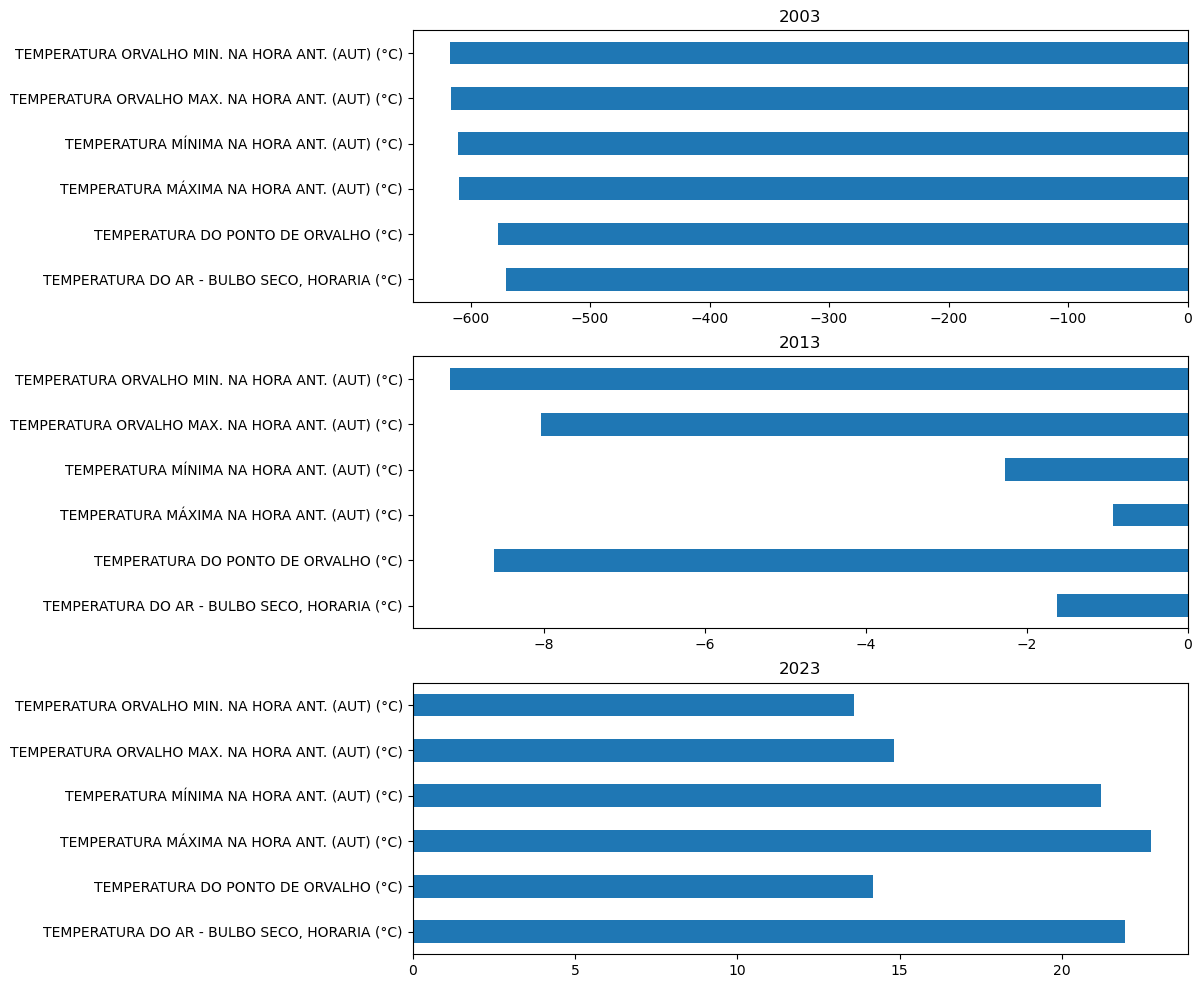

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
for i in range(len(mediaTemperatura.index.to_list())):
    mediaTemperatura.iloc[i].plot(ax = axes[i],kind="barh")
    axes[i].set_title(str(2003+10*i))

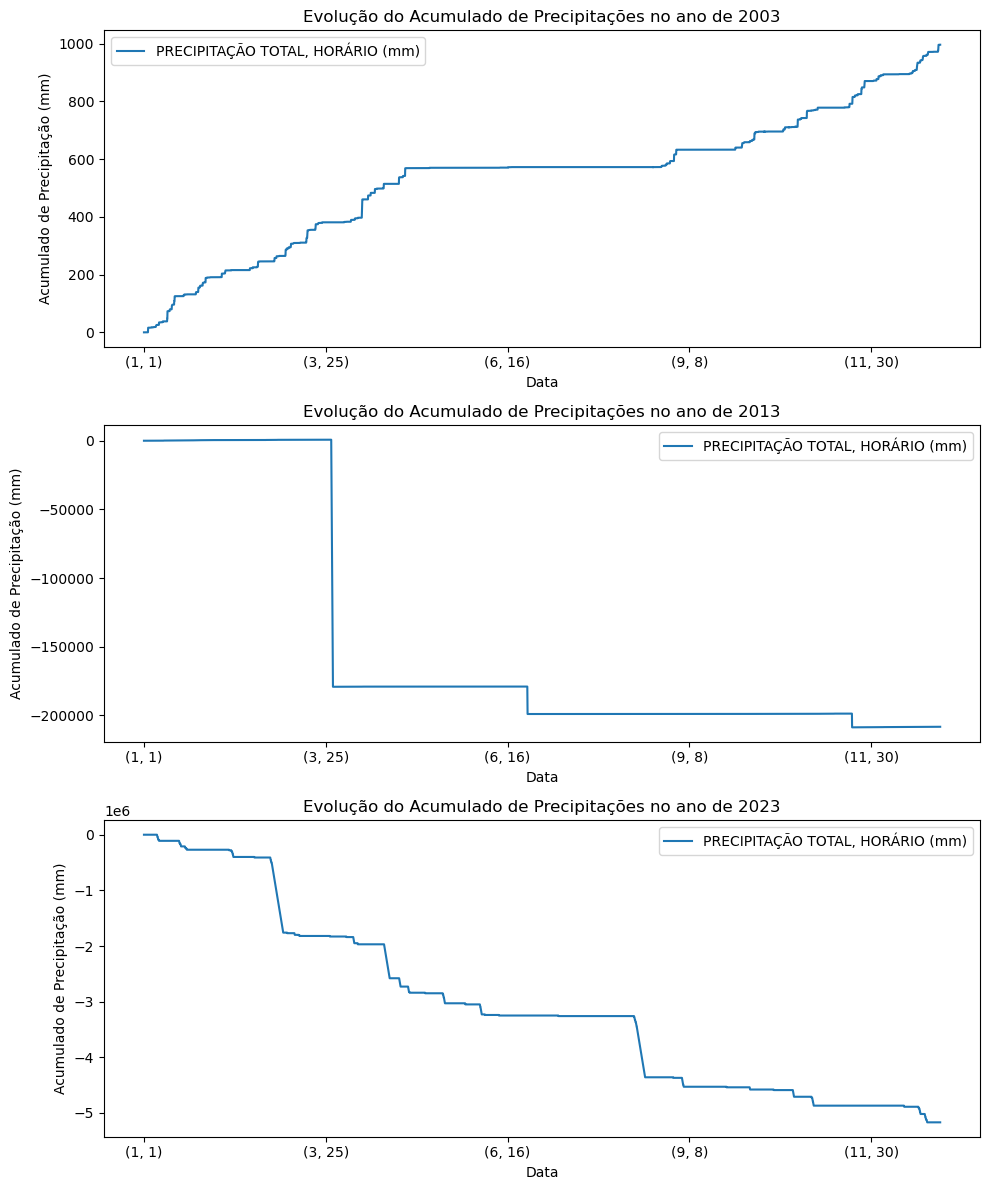

In [11]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

acumulaPrecipitacao.xs(2023, level='Ano').plot(ax=axes[0]) 
acumulaPrecipitacao.xs(2013, level='Ano').plot(ax=axes[1])
acumulaPrecipitacao.xs(2003, level='Ano').plot(ax=axes[2])
ano = 2003
for ax in axes:
    ax.set_title('Evolução do Acumulado de Precipitações no ano de ' + str(ano))
    ax.set_xlabel('Data')
    ax.set_ylabel('Acumulado de Precipitação (mm)')
    ano +=10

plt.tight_layout()



2. Prepare um gráfico que mostre como foi o acumulado de precipitações de Junho nos três anos.

In [12]:
junhoBrasilia = brasilia[brasilia.index.get_level_values('Mes') == 6]['Precipitação'].groupby(level=['Ano']).cumsum()

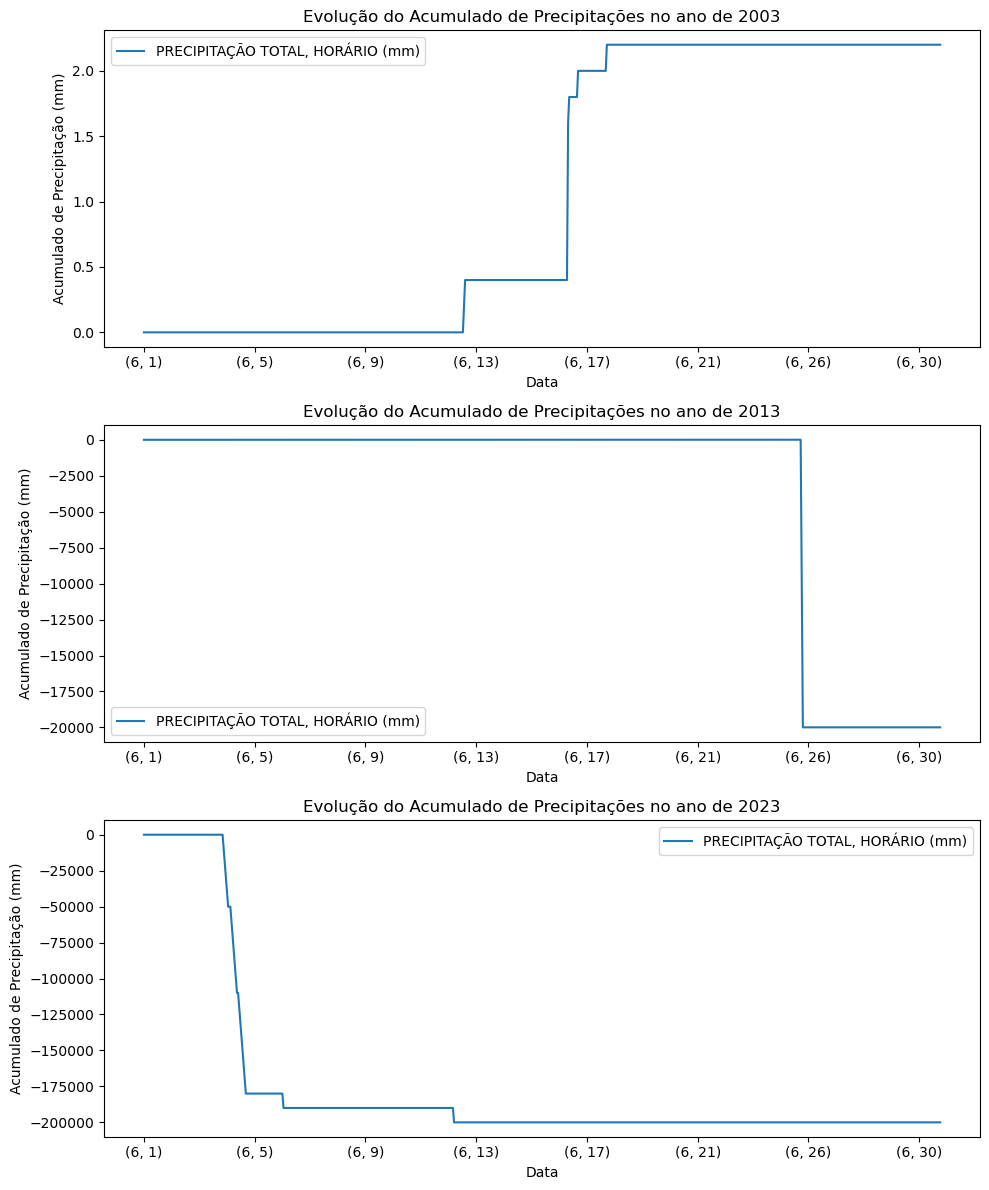

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

junhoBrasilia.xs(2023, level='Ano').plot(ax=axes[0]) 
junhoBrasilia.xs(2013, level='Ano').plot(ax=axes[1])
junhoBrasilia.xs(2003, level='Ano').plot(ax=axes[2])
ano = 2003
for ax in axes:
    ax.set_title('Evolução do Acumulado de Precipitações no ano de ' + str(ano))
    ax.set_xlabel('Data')
    ax.set_ylabel('Acumulado de Precipitação (mm)')
    ano +=10

plt.tight_layout()


3.Prepare um gráfico que mostre como foi a temperatura media de cada um dos dias de Março nos três anos.

In [14]:
marcoBrasilia = brasilia[brasilia.index.get_level_values('Mes') == 3]['Temperatura'].groupby(level=['Ano', 'Dia']).mean()

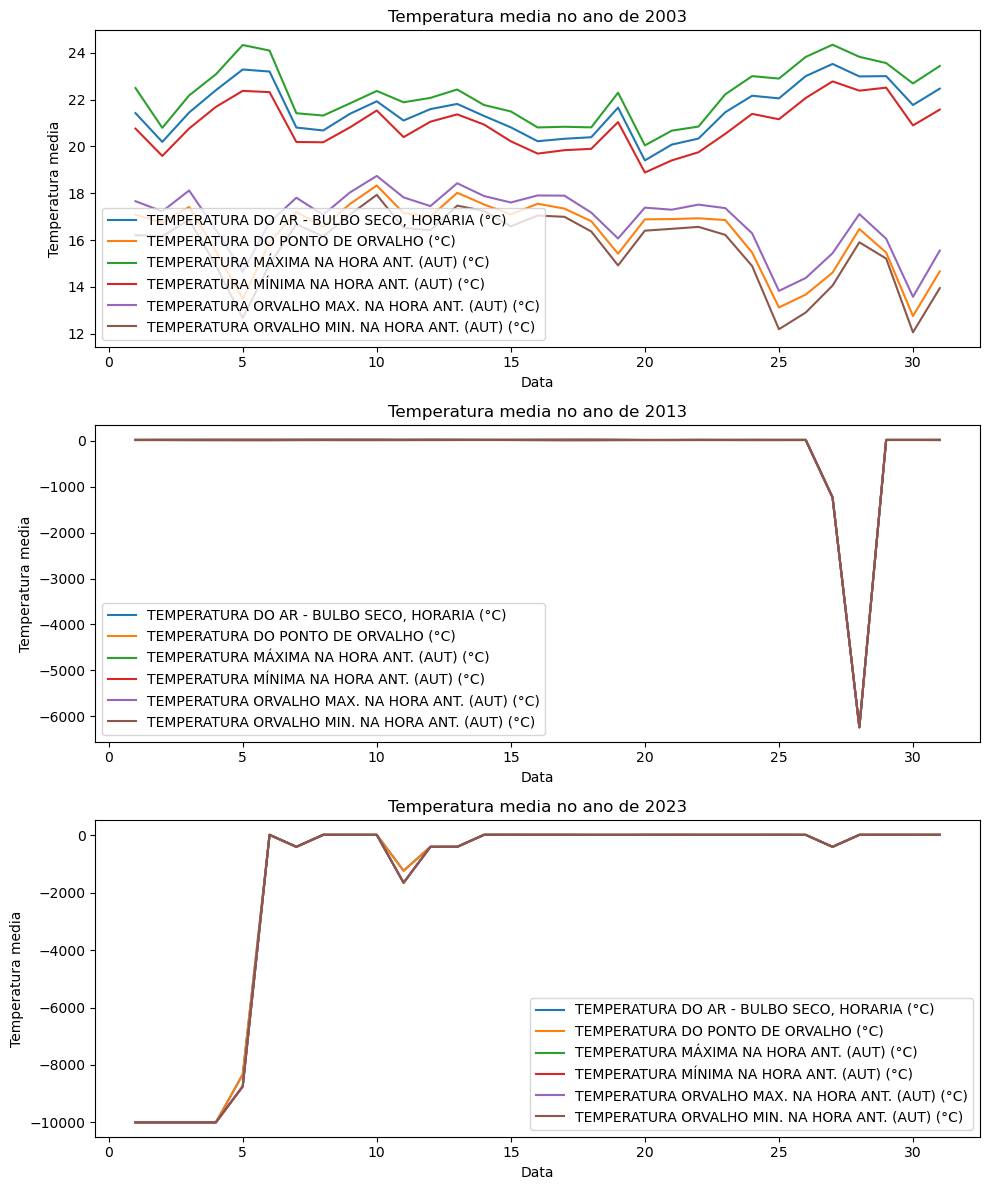

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

marcoBrasilia.xs(2023, level='Ano').plot(ax=axes[0]) 
marcoBrasilia.xs(2013, level='Ano').plot(ax=axes[1])
marcoBrasilia.xs(2003, level='Ano').plot(ax=axes[2])
ano = 2003
for ax in axes:
    ax.set_title('Temperatura media no ano de ' + str(ano))
    ax.set_xlabel('Data')
    ax.set_ylabel('Temperatura media')
    ano +=10

plt.tight_layout()

4. Considere uma aproximação para as estações do ano no brasil dada por: Verão
 (Janeiro, Fevereiro e Março), Outono (Abril, Maio e Junho), Inverno (Julho, Agosto e
 Setembro) Primavera (Outubro, Novembro e Dezembro). Prepare um gráfico que
 mostre como se comportaram as temperaturas máxima e mínima de cada uma das
 estações nos tres anos.

In [16]:
estações = []
for mes in brasilia.index.get_level_values('Mes'):
    if mes <= 3:
        estações.append("VERÃO")
    elif mes <= 6:
        estações.append("OUTONO")
    elif mes <= 9:
        estações.append("INVERNO")
    else:
        estações.append("PRIMAVERA")
brasilia['Estações'] = estações


In [17]:
tempPorEstacoes = brasilia.groupby([brasilia.index.get_level_values("Ano"),"Estações"])["Temperatura"].agg(["min","max"])

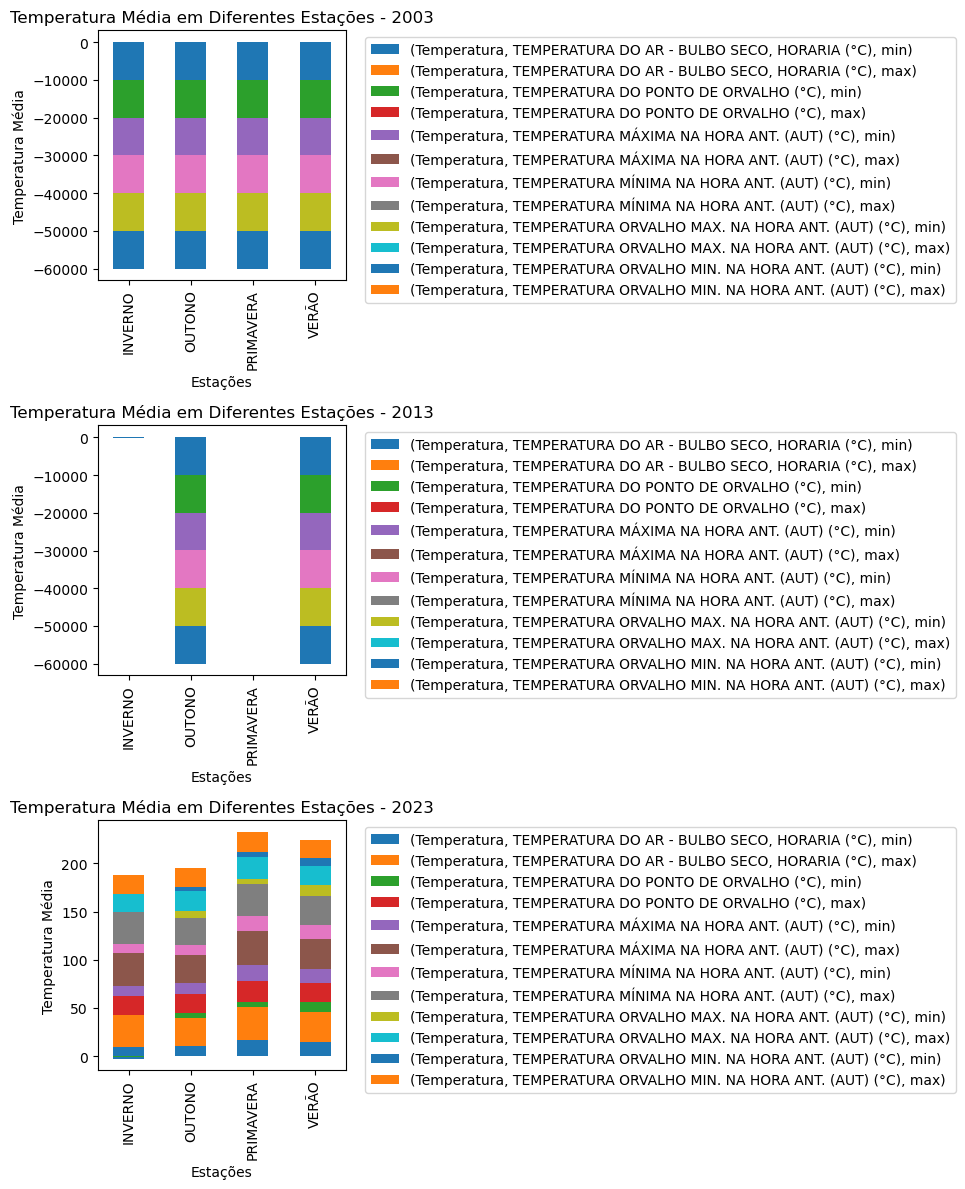

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

for i, ano in enumerate(tempPorEstacoes.index.get_level_values('Ano').unique()):
    dadosAno = tempPorEstacoes.xs(ano, level='Ano')
    dadosAno.plot(kind='bar', ax=axes[i], stacked=True)

    axes[i].set_title(f'Temperatura Média em Diferentes Estações - {ano}')
    axes[i].set_xlabel('Estações')
    axes[i].set_ylabel('Temperatura Média')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
plt.tight_layout()


5. Repare que os dados de cada estação são monitorando de hora em hora. Considere
 os intervalos de um dia como sendo: Madrugada (00:00 a 06:00), Manha (06:00 a
 12:00), Tarde (12:00 a 18:00) e Noite (18:00 a 00:00). Crie um gráfico que mostre
 com se comportou a temperatura temperatura media o dia 28 de setembro em cada
 um dos intervalos do dia dos três anos.

In [19]:
limites = [-1, 6, 12, 18, 24]
rotulos = ["MADRUGADA", "MANHÃ", "TARDE", "NOITE"]
brasilia['INTERVALO'] = pd.cut(brasilia["HORA (UTC)"], bins=limites, labels=rotulos)
brasilia.set_index('INTERVALO', append=True, inplace=True)

In [42]:
brasilia2809 = brasilia.loc[(brasilia.index.get_level_values("Ano"))&(brasilia.index.get_level_values("Dia") == 28) & (brasilia.index.get_level_values("Mes") == 9)]
brasilia2809 = brasilia2809.groupby([brasilia2809.index.get_level_values("Ano"), "INTERVALO"])["Temperatura"].mean()

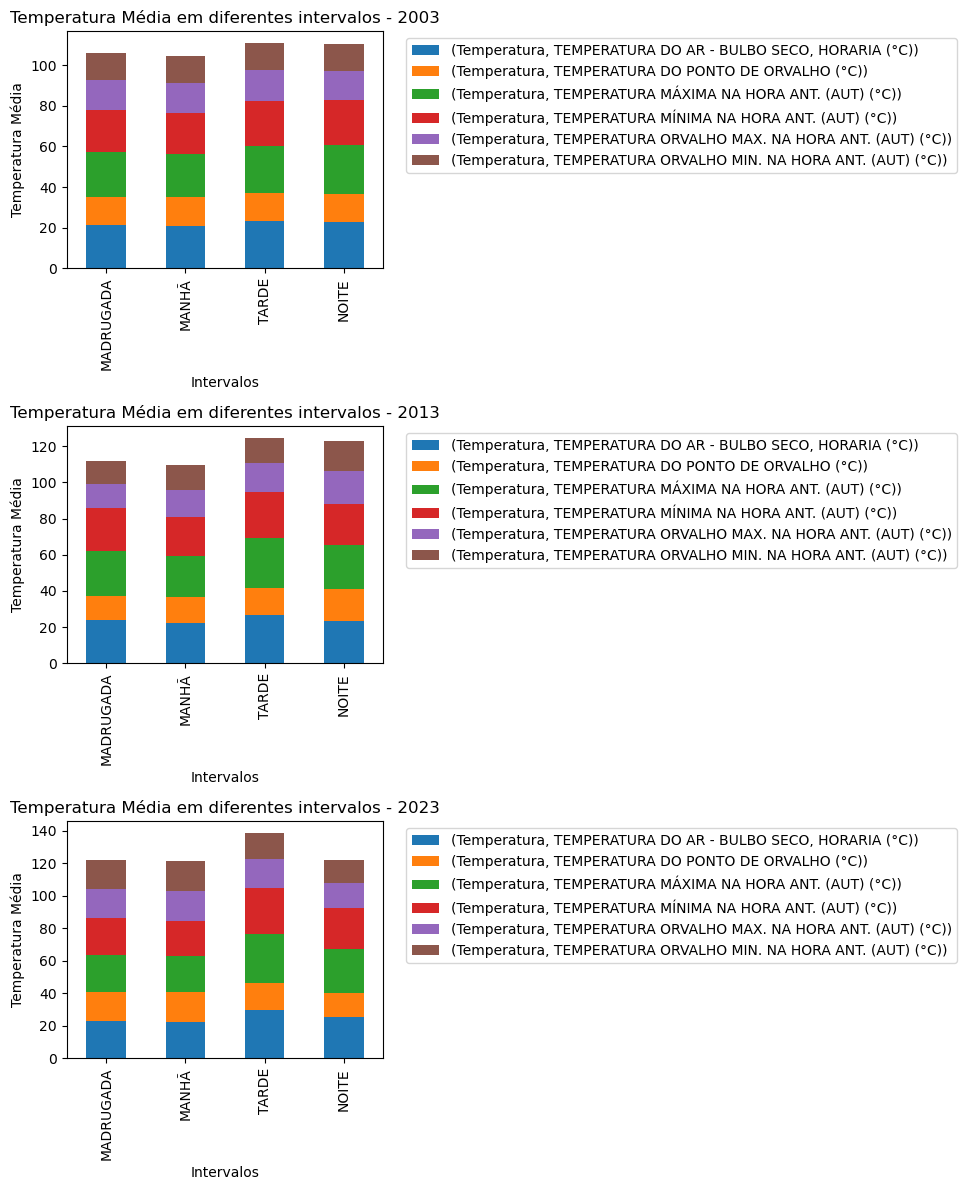

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))

for i, ano in enumerate(brasilia2809.index.get_level_values('Ano').unique()):
    dadosAno = brasilia2809.xs(ano, level='Ano')
    dadosAno.plot(kind='bar', ax=axes[i], stacked=True)

    axes[i].set_title(f'Temperatura Média em diferentes intervalos - {ano}')
    axes[i].set_xlabel('Intervalos')
    axes[i].set_ylabel('Temperatura Média')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
plt.tight_layout()
